In [44]:
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import sys
import pickle
import os
import pdb
 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns

# %pylab inline
# inline doesn't give interactive plots
%matplotlib inline 
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'

%load_ext autoreload
%autoreload 2

sns.set()

sys.path.append("../workstatation")

from utils.trajectory_utils import truncate_expert_data
from utils import data_utils
from utils.control_loop_data import ControlLoopData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
def plot_2d_array(data, figsize=(6, 6), legend_label='', title='',
                  xlabel='', ylabel='', colors=[], marker='o',
                  linestyle='', linewidth=1.0, markersize=1):
    '''Plt a 2D numpy array.'''
    if len(colors) == 0:
        colors = sns.color_palette(n_colors=data.shape[1])
    
    if type(legend_label) is str and len(legend_label) == 0:
        legend_label = [str(i) for i in range(data.shape[1])]
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, title=title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    lines = []
    for i in range(data.shape[1]):
        l = ax.plot(data[:, i], color=colors[i], label=legend_label[i],
                     marker=marker, linestyle='dashed',
                     linewidth=linewidth, markersize=markersize)
        lines.append(l[0])
    plt.legend(handles=lines)
    plt.show()

[(0, 3982), (3982, 7980), (7980, 11966), (11966, 14497), (14497, 18484), (18484, 22483), (22483, 25130), (25130, 40393), (40393, 41389), (41389, 45388), (45388, 49367), (49367, 52177), (52177, 65095)]


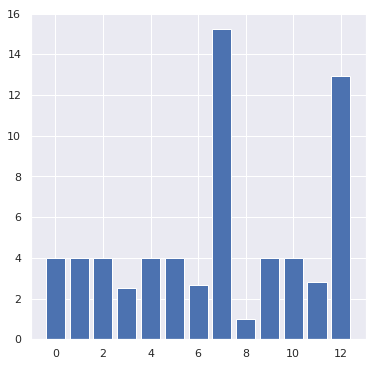

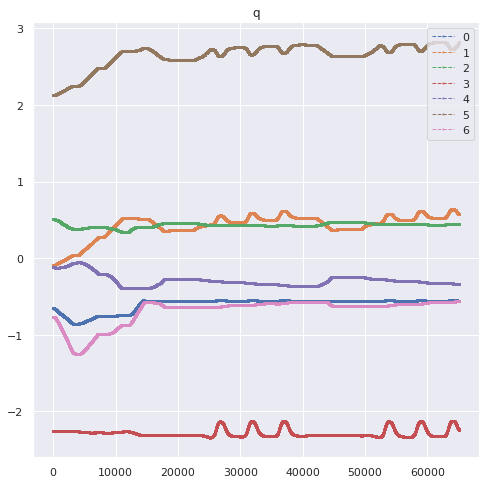

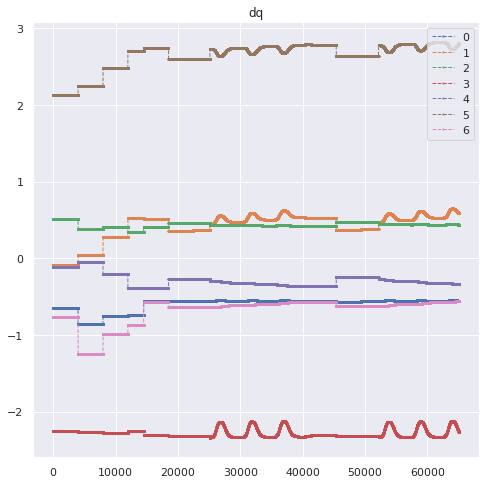

dict

In [46]:
control_loop_data_path = '/media/hdd/mohit/cutting_data/robot_data_Jan_18/try_2/control_loop_data.txt'
csv_data = data_utils.read_data_as_csv(control_loop_data_path)

control_loop_data = ControlLoopData(csv_data) 
print(control_loop_data.skill_time_as_tuple_list)

skill_times = control_loop_data.get_duration_for_each_skill()
skill_times_in_seconds = [t/1000.0 for t in skill_times] 

matplotlib.pyplot.bar(range(len(skill_times_in_seconds)), skill_times_in_seconds)
plt.show()

# plt.plot(control_loop_data.data_as_ord_dict['q'][:, :])
# plt.show()
plot_2d_array(control_loop_data.data_as_ord_dict['q'], title='q',
              legend_label=['0', '1', '2', '3', '4', '5', '6'],
              figsize=(8, 8))
plot_2d_array(control_loop_data.data_as_ord_dict['dq'], figsize=(8, 8), title='dq')

type(csv_data)
